# Homework: lecture 1 (x points)


To begin, answer the questions below:


In [1]:
# Packages and code used to make the grading work
# Do not edit this, just execute it
from ipywidgets import widgets
from grading.ok import check
#import autograde.notebook as nb
#import matplotlib.pyplot as plt

## Question 1
What is the best fruit? (Select one answer)

In [16]:
# A multiple choice question. Students select one of the replies
# the value they select will be available as `q1.value`
# There are many more widgets https://ipywidgets.readthedocs.io/en/stable/index.html
# that we could use to build simple questions that aren't code
# We'd probably want to make a helper in one of the earthpy libraries
# that removes some of the boilerplate?
q1 = widgets.Select(
    options=['Apples', 'Oranges', 'Pears', 'Banana', 'Chocolate'],
    description='The best fruit is',
    style={'description_width': 'initial'}
)
q1

Select(description='The best fruit is', options=('Apples', 'Oranges', 'Pears', 'Banana', 'Chocolate'), style=D…

In [17]:
# this will be a public test of the answer
assert q1.value, "You need to select one reply"

In [19]:
# this will be a private test of the answer
# Students won't be able to see this
assert 'Chocolate' in q1.value, "The best fruit is chocolate"

## Question 2

We discussed sports at great length in the lecture. Select the best sports from the list below. (select one or more replies)

In [20]:
# A multiple choice question. Students select one or more of the replies
# the value(s) they select will be available as `q1.value`
q2 = widgets.SelectMultiple(
    options=['Eating', 'Running', 'Swimming', 'Cycling'],
    description='The best sports are',
    style={'description_width': 'initial'}
)
q2

SelectMultiple(description='The best sports are', options=('Eating', 'Running', 'Swimming', 'Cycling'), style=…

In [17]:
assert q2.value, "You need to select at least one reply"

In [19]:
# to compute credit that isn't 0/1 create a function
# that returns a number, the credit achieved.
# XXX is this the best way of doing this?
def check_q2():
    score = 0
    if 'Cycling' not in q2.value:
        print("Cycling is one of the best sports")
    else:
        score += 1
    if 'Running' not in q2.value:
        print("Running is one of the best sports")
    else:
        score += 1
    if 'Swimming' not in q2.value:
        print("Swimming is one of the best sports")
    else:
        score += 1
    return score

## Question 3

In the cell below answer the following question: Why should you combine chocolate with exercise? 

### BEGIN ANSWER

The model answer is written here. In the student notebook everything between the ### BEGIN and ### END tags will be removed and replaced by "YOUR ANSWER HERE"

We have to tag this cell to specify how many marks the question is worth. This will be used during the manual grading somehow.

### END ANSWER

## Plot 1: Roads Map and Legend (x points)  

Create a map of California roads:

Use the `madera-county-roads/tl_2013_06039_roads.shp` layer (located in your `spatial-vector-lidar` data folder that  you downloaded for class) to create a map that shows:

1. the madera roads layer (`madera-county-roads/tl_2013_06039_roads.shp`), 
2. sjer plot locations (`vector_data/SJER_plot_centroids.shp`) and the 
3. sjer_aoi boundary (`sjer_crop.shp`)

Create a map of California roads:

1. Import the `madera-county-roads/tl_2013_06039_roads.shp` layer located in your `week_04` data download.
2. Create a map that shows the madera roads layer, sjer plot locations and the sjer_aoi boundary (sjer_crop.shp).
3. Plot the roads so different **road types** (using the RTTYP field) are represented using unique symbology. Use the `RTTYP` field to plot unique road types.
4. Map the plot locations by the attribute **plot type** using unique symbology for each "type".
4. Add a **title** to your plot.
5. Adjust your plot legend so that the full name for each `RTTYP` name is clearly represented in your legend. HINT: You will need to consult the metadata for that layer to determine what each `RTTYP` type represents.
6. Be sure that your plot legend is not covering your data.

**IMPORTANT:** be sure that all of the data are within the same `EXTENT` and `crs` of the `sjer_aoi` layer. This means that you may have to crop and reproject your data prior to plotting it!

In [2]:
# Import the libraries that you will need

# The contents between the ### BEGIN and ### END tags will be removed
# and replaced by `# Your code here`
# no grading happens here

### BEGIN SOLUTION
import os
import earthpy as et
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib
from shapely.geometry import box
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import shapely
### END SOLUTION


The chunk above contains packages required for grading
The chunk below is an example student answer. notice that here we have several different ways that a student may opt to plot. this is used to test how we grade different approaches to plottin.

In [ ]:
# Cell's tagged as "answer" are removed from the student version, they will not
# form part of what the autograder adds to a student's notebook during
# the grading process. They will be visible to a manual grader

# set home directory and download data
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))
path_data = et.data.get_data('spatial-vector-lidar')

# Import data
sjer_aoi = gpd.read_file(
    'data/spatial-vector-lidar/california/neon-sjer-site/vector_data/SJER_crop.shp')
sjer_roads = gpd.read_file(
    'data/spatial-vector-lidar/california/madera-county-roads/tl_2013_06039_roads.shp')
sjer_plots = gpd.read_file(
    'data/spatial-vector-lidar/california/neon-sjer-site/vector_data/SJER_plot_centroids.shp')

# replace roads with a missing RTTYP value with "Unknown"
sjer_roads = sjer_roads.replace(
    {'RTTYP': {'': "Unknown", 'C': 'County', 'S': 'State Recognized', 'M': 'Common Name'}})

# reproject roads and plot data
sjer_roads = sjer_roads.to_crs(sjer_aoi.crs)

# crop the data
sjer_roads['geometry'] = sjer_roads.geometry.intersection(
    box(*sjer_aoi.total_bounds))
sjer_roads = sjer_roads[sjer_roads['geometry'].is_empty == False].reset_index(drop=True)

# VARIOUS WAYS TO PLOT DATA
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_axis_off()
case = 1


if case == 1:
    # set colors and label names
    roadPalette = {'Common Name': 'black', 'State Recognized': 'blue',
                   'County': 'grey', 'Unknown': 'lightgrey'}
    linestyle_dict = {'Common Name': ':', 'State Recognized': '--',
                   'Unknown': '-.'}
    pointsPalette = {'trees': 'chartreuse',
                     'grass': 'darkgreen', 'soil': 'burlywood'}
    marker_dict = {'trees': '+', 'grass': '*', 'soil': 'o'}

    # plot data
    for plot_type, data in sjer_plots.groupby('plot_type'):
        data.plot(color=pointsPalette[plot_type], ax=ax, label=plot_type,
                  markersize=50, marker=marker_dict[plot_type])
    for road_type, data in sjer_roads.groupby('RTTYP'):
        data.plot(color=roadPalette[road_type], ax=ax,
                  label=road_type, linestyle = linestyle_dict[road_type])
    #ax.legend(loc=(1.1, .1),prop={'size': 16}, frameon=False)
    
if case == 2:
    # set colors and label names
    point_colors = ['darkgreen', 'burlywood', 'chartreuse']
    point_labels = ['grass', 'soil', 'trees']
    line_colors = ['black', 'blue', 'lightgrey']
    line_labels = ['Common Name', 'State Recognized', 'Unknown']

        # plot points and roads
    sjer_plots.plot(ax=ax, column='plot_type', cmap=ListedColormap(point_colors), legend = True)
    sjer_roads.plot(ax=ax, column='RTTYP', cmap=ListedColormap(line_colors), linestyle = 'None', legend = True)

    
    # create legend
    point_types = [Line2D([0], [0], marker = 'o', color=c, linestyle = 'None', 
                      markersize=10) for c in point_colors]
    line_types = [Line2D([0], [0], color=c) for c in line_colors]
    leg1 = ax.legend(point_types, point_labels, loc=(1.1, .3), title='Plot Type', prop={'size': 16}, frameon=False)
    leg2 = ax.legend(line_types, line_labels, loc=(1.1, .1), title='Road Type', prop={'size': 16}, frameon=False)
    ax.add_artist(leg1)
    plt.setp(leg2.get_title(), fontsize='15')
    plt.setp(leg1.get_title(), fontsize='15')
    
# add title and legend details
ax.set(title= 'Homework Plot 1: \nMadera County Roads and study plot locations')

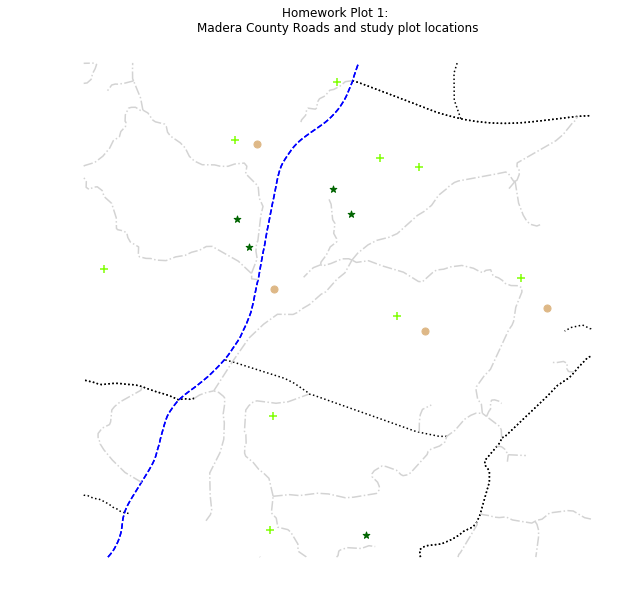

In [5]:
### DO NOT REMOVE LINE BELOW ###
# all results have to be assigned to a variable that has a
# unique name and does not get reused in the notebook.
q4_ax1 = nb.convert_axes(plt)

In [6]:
# Test Suite for Plot 1
# currently i want more verbose but also cleaner feedback.
# note that above i commented out the legend. and the legend tests thus failed.
# i'd like a very user friendly feedback block with the tests that passed vs failed. 
# below is ugly and scary but it does work!

# this test has to be private as it depends on code from `earthanalytics`
# which is a private package
from earthanalytics.hw4_tests import homework4_tests
hw4t = homework4_tests()
results = unittest.TextTestRunner().run(hw4t.p1_tests(q4_ax1))

s.ssF....s.s
FAIL: test_legend_labels (autograde.cases.PlotBasicSuite.__init__.<locals>.LegendTest)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/Users/lewa8222/anaconda3/envs/earth-analytics-python/lib/python3.6/site-packages/autograde/cases.py", line 94, in test_legend_labels
    self.pt.assert_legend_labels(labels_exp=legend_labels)
  File "/Users/lewa8222/anaconda3/envs/earth-analytics-python/lib/python3.6/site-packages/autograde/base.py", line 277, in assert_legend_labels
    assert legends, 'Legend does not exist'
AssertionError: Legend does not exist

----------------------------------------------------------------------
Ran 12 tests in 0.486s

FAILED (failures=1, skipped=5)
